This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sp5.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp5/ref/m.dat &> /dev/null

# MuMag Standard Problem #5

## Run Simulation

In [2]:
from magnumnp import *
import torch
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

# initialize state
dt = 1e-11
n  = (40, 40, 1)
dx = (2.5e-9, 2.5e-9, 10e-9)
mesh = Mesh(n, dx)
state = State(mesh)

state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.1,
    "xi": 0.05,
    "b": 72.17e-12
    }

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
torque   = SpinTorqueZhangLi()

# initialize magnetization
state.m = state.Constant([0,0,0])
state.m[:20,:,:,1] = -1.
state.m[20:,:,:,1] = 1.
state.m[20,20,:,1] = 0.
state.m[20,20,:,2] = 1.

state.j = state.Constant([1e12, 0, 0])

# relax without external field
minimizer = MinimizerBB([demag, exchange])
minimizer.minimize(state)
state.write_vtk(state.m, "data/m0")

# perform integration with spin torque
llg = LLGSolver([demag, exchange, torque])
logger = Logger(this_dir / "data", ['t', 'm'])

for i in tqdm(torch.arange(0, 5e-9, dt)):
    llg.step(state, dt)
    logger << state

Timer.print_report()

2024-11-06 13:50:55  magnum.np:INFO magnum.np 2.0.1


2024-11-06 13:50:55  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2024-11-06 13:50:55  magnum.np:INFO [Mesh] 40x40x1 (dx= 2.5e-09 x 2.5e-09 x 1e-08)


2024-11-06 13:51:05  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)


  0%|          | 0/501 [00:00<?, ?it/s]

  0%|          | 1/501 [00:04<41:18,  4.96s/it]

  0%|          | 2/501 [00:05<18:11,  2.19s/it]

  1%|          | 3/501 [00:05<10:48,  1.30s/it]

  1%|          | 4/501 [00:05<07:21,  1.13it/s]

  1%|          | 5/501 [00:05<05:23,  1.53it/s]

  1%|          | 6/501 [00:06<04:14,  1.95it/s]

  1%|▏         | 7/501 [00:06<03:31,  2.34it/s]

  2%|▏         | 8/501 [00:06<03:03,  2.68it/s]

  2%|▏         | 9/501 [00:06<02:45,  2.97it/s]

  2%|▏         | 10/501 [00:07<02:33,  3.20it/s]

  2%|▏         | 11/501 [00:07<02:22,  3.44it/s]

  2%|▏         | 12/501 [00:07<02:13,  3.65it/s]

  3%|▎         | 13/501 [00:07<02:10,  3.75it/s]

  3%|▎         | 14/501 [00:08<02:03,  3.95it/s]

  3%|▎         | 15/501 [00:08<02:01,  4.01it/s]

  3%|▎         | 16/501 [00:08<01:59,  4.06it/s]

  3%|▎         | 17/501 [00:08<01:59,  4.04it/s]

  4%|▎         | 18/501 [00:09<02:01,  3.98it/s]

  4%|▍         | 19/501 [00:09<01:58,  4.07it/s]

  4%|▍         | 20/501 [00:09<01:55,  4.17it/s]

  4%|▍         | 21/501 [00:09<01:54,  4.20it/s]

  4%|▍         | 22/501 [00:10<01:54,  4.19it/s]

  5%|▍         | 23/501 [00:10<01:57,  4.08it/s]

  5%|▍         | 24/501 [00:10<01:53,  4.20it/s]

  5%|▍         | 25/501 [00:10<01:54,  4.14it/s]

  5%|▌         | 26/501 [00:11<01:55,  4.13it/s]

  5%|▌         | 27/501 [00:11<01:54,  4.16it/s]

  6%|▌         | 28/501 [00:11<01:52,  4.21it/s]

  6%|▌         | 29/501 [00:11<01:53,  4.15it/s]

  6%|▌         | 30/501 [00:12<01:51,  4.21it/s]

  6%|▌         | 31/501 [00:12<01:52,  4.19it/s]

  6%|▋         | 32/501 [00:12<01:51,  4.22it/s]

  7%|▋         | 33/501 [00:12<01:50,  4.23it/s]

  7%|▋         | 34/501 [00:12<01:51,  4.17it/s]

  7%|▋         | 35/501 [00:13<01:49,  4.27it/s]

  7%|▋         | 36/501 [00:13<01:50,  4.20it/s]

  7%|▋         | 37/501 [00:13<01:49,  4.23it/s]

  8%|▊         | 38/501 [00:13<01:50,  4.20it/s]

  8%|▊         | 39/501 [00:14<01:49,  4.24it/s]

  8%|▊         | 40/501 [00:14<01:47,  4.27it/s]

  8%|▊         | 41/501 [00:14<01:48,  4.25it/s]

  8%|▊         | 42/501 [00:14<01:45,  4.36it/s]

  9%|▊         | 43/501 [00:15<01:45,  4.35it/s]

  9%|▉         | 44/501 [00:15<01:47,  4.27it/s]

  9%|▉         | 45/501 [00:15<01:48,  4.22it/s]

  9%|▉         | 46/501 [00:15<01:49,  4.14it/s]

  9%|▉         | 47/501 [00:16<01:47,  4.21it/s]

 10%|▉         | 48/501 [00:16<01:44,  4.32it/s]

 10%|▉         | 49/501 [00:16<01:46,  4.23it/s]

 10%|▉         | 50/501 [00:16<01:45,  4.26it/s]

 10%|█         | 51/501 [00:16<01:46,  4.22it/s]

 10%|█         | 52/501 [00:17<01:49,  4.10it/s]

 11%|█         | 53/501 [00:17<01:49,  4.09it/s]

 11%|█         | 54/501 [00:17<01:50,  4.03it/s]

 11%|█         | 55/501 [00:17<01:50,  4.04it/s]

 11%|█         | 56/501 [00:18<01:47,  4.13it/s]

 11%|█▏        | 57/501 [00:18<01:48,  4.10it/s]

 12%|█▏        | 58/501 [00:18<01:48,  4.07it/s]

 12%|█▏        | 59/501 [00:18<01:48,  4.07it/s]

 12%|█▏        | 60/501 [00:19<01:49,  4.02it/s]

 12%|█▏        | 61/501 [00:19<01:47,  4.09it/s]

 12%|█▏        | 62/501 [00:19<01:45,  4.17it/s]

 13%|█▎        | 63/501 [00:19<01:43,  4.23it/s]

 13%|█▎        | 64/501 [00:20<01:43,  4.24it/s]

 13%|█▎        | 65/501 [00:20<01:44,  4.16it/s]

 13%|█▎        | 66/501 [00:20<01:44,  4.16it/s]

 13%|█▎        | 67/501 [00:20<01:45,  4.13it/s]

 14%|█▎        | 68/501 [00:21<01:42,  4.21it/s]

 14%|█▍        | 69/501 [00:21<01:41,  4.26it/s]

 14%|█▍        | 70/501 [00:21<01:41,  4.23it/s]

 14%|█▍        | 71/501 [00:21<01:42,  4.21it/s]

 14%|█▍        | 72/501 [00:22<01:42,  4.18it/s]

 15%|█▍        | 73/501 [00:22<01:40,  4.25it/s]

 15%|█▍        | 74/501 [00:22<01:41,  4.21it/s]

 15%|█▍        | 75/501 [00:22<01:40,  4.26it/s]

 15%|█▌        | 76/501 [00:22<01:40,  4.23it/s]

 15%|█▌        | 77/501 [00:23<01:43,  4.11it/s]

 16%|█▌        | 78/501 [00:23<01:41,  4.16it/s]

 16%|█▌        | 79/501 [00:23<01:40,  4.19it/s]

 16%|█▌        | 80/501 [00:23<01:40,  4.20it/s]

 16%|█▌        | 81/501 [00:24<01:41,  4.15it/s]

 16%|█▋        | 82/501 [00:24<01:41,  4.13it/s]

 17%|█▋        | 83/501 [00:24<01:40,  4.15it/s]

 17%|█▋        | 84/501 [00:24<01:42,  4.08it/s]

 17%|█▋        | 85/501 [00:25<01:41,  4.12it/s]

 17%|█▋        | 86/501 [00:25<01:41,  4.08it/s]

 17%|█▋        | 87/501 [00:25<01:39,  4.16it/s]

 18%|█▊        | 88/501 [00:25<01:39,  4.13it/s]

 18%|█▊        | 89/501 [00:26<01:37,  4.23it/s]

 18%|█▊        | 90/501 [00:26<01:36,  4.24it/s]

 18%|█▊        | 91/501 [00:26<01:36,  4.26it/s]

 18%|█▊        | 92/501 [00:26<01:35,  4.27it/s]

 19%|█▊        | 93/501 [00:27<01:35,  4.27it/s]

 19%|█▉        | 94/501 [00:27<01:34,  4.29it/s]

 19%|█▉        | 95/501 [00:27<01:33,  4.32it/s]

 19%|█▉        | 96/501 [00:27<01:35,  4.25it/s]

 19%|█▉        | 97/501 [00:27<01:34,  4.26it/s]

 20%|█▉        | 98/501 [00:28<01:33,  4.30it/s]

 20%|█▉        | 99/501 [00:28<01:33,  4.29it/s]

 20%|█▉        | 100/501 [00:28<01:33,  4.27it/s]

 20%|██        | 101/501 [00:28<01:35,  4.20it/s]

 20%|██        | 102/501 [00:29<01:36,  4.14it/s]

 21%|██        | 103/501 [00:29<01:37,  4.10it/s]

 21%|██        | 104/501 [00:29<01:38,  4.04it/s]

 21%|██        | 105/501 [00:29<01:36,  4.08it/s]

 21%|██        | 106/501 [00:30<01:36,  4.10it/s]

 21%|██▏       | 107/501 [00:30<01:37,  4.06it/s]

 22%|██▏       | 108/501 [00:30<01:36,  4.08it/s]

 22%|██▏       | 109/501 [00:30<01:35,  4.12it/s]

 22%|██▏       | 110/501 [00:31<01:34,  4.15it/s]

 22%|██▏       | 111/501 [00:31<01:34,  4.15it/s]

 22%|██▏       | 112/501 [00:31<01:33,  4.17it/s]

 23%|██▎       | 113/501 [00:31<01:32,  4.18it/s]

 23%|██▎       | 114/501 [00:32<01:34,  4.11it/s]

 23%|██▎       | 115/501 [00:32<01:33,  4.14it/s]

 23%|██▎       | 116/501 [00:32<01:33,  4.14it/s]

 23%|██▎       | 117/501 [00:32<01:30,  4.24it/s]

 24%|██▎       | 118/501 [00:33<01:32,  4.16it/s]

 24%|██▍       | 119/501 [00:33<01:30,  4.24it/s]

 24%|██▍       | 120/501 [00:33<01:29,  4.26it/s]

 24%|██▍       | 121/501 [00:33<01:30,  4.21it/s]

 24%|██▍       | 122/501 [00:33<01:30,  4.19it/s]

 25%|██▍       | 123/501 [00:34<01:32,  4.07it/s]

 25%|██▍       | 124/501 [00:34<01:34,  3.98it/s]

 25%|██▍       | 125/501 [00:34<01:34,  3.99it/s]

 25%|██▌       | 126/501 [00:34<01:31,  4.11it/s]

 25%|██▌       | 127/501 [00:35<01:28,  4.20it/s]

 26%|██▌       | 128/501 [00:35<01:28,  4.22it/s]

 26%|██▌       | 129/501 [00:35<01:30,  4.10it/s]

 26%|██▌       | 130/501 [00:35<01:30,  4.12it/s]

 26%|██▌       | 131/501 [00:36<01:28,  4.16it/s]

 26%|██▋       | 132/501 [00:36<01:28,  4.15it/s]

 27%|██▋       | 133/501 [00:36<01:29,  4.10it/s]

 27%|██▋       | 134/501 [00:36<01:29,  4.12it/s]

 27%|██▋       | 135/501 [00:37<01:27,  4.17it/s]

 27%|██▋       | 136/501 [00:37<01:27,  4.18it/s]

 27%|██▋       | 137/501 [00:37<01:27,  4.16it/s]

 28%|██▊       | 138/501 [00:37<01:25,  4.23it/s]

 28%|██▊       | 139/501 [00:38<01:25,  4.23it/s]

 28%|██▊       | 140/501 [00:38<01:25,  4.20it/s]

 28%|██▊       | 141/501 [00:38<01:25,  4.21it/s]

 28%|██▊       | 142/501 [00:38<01:25,  4.22it/s]

 29%|██▊       | 143/501 [00:39<01:24,  4.24it/s]

 29%|██▊       | 144/501 [00:39<01:25,  4.18it/s]

 29%|██▉       | 145/501 [00:39<01:25,  4.15it/s]

 29%|██▉       | 146/501 [00:39<01:24,  4.22it/s]

 29%|██▉       | 147/501 [00:39<01:22,  4.27it/s]

 30%|██▉       | 148/501 [00:40<01:23,  4.23it/s]

 30%|██▉       | 149/501 [00:40<01:22,  4.29it/s]

 30%|██▉       | 150/501 [00:40<01:21,  4.29it/s]

 30%|███       | 151/501 [00:40<01:23,  4.21it/s]

 30%|███       | 152/501 [00:41<01:22,  4.23it/s]

 31%|███       | 153/501 [00:41<01:22,  4.23it/s]

 31%|███       | 154/501 [00:41<01:22,  4.20it/s]

 31%|███       | 155/501 [00:41<01:20,  4.27it/s]

 31%|███       | 156/501 [00:42<01:21,  4.26it/s]

 31%|███▏      | 157/501 [00:42<01:21,  4.24it/s]

 32%|███▏      | 158/501 [00:42<01:21,  4.21it/s]

 32%|███▏      | 159/501 [00:42<01:21,  4.20it/s]

 32%|███▏      | 160/501 [00:43<01:21,  4.17it/s]

 32%|███▏      | 161/501 [00:43<01:21,  4.15it/s]

 32%|███▏      | 162/501 [00:43<01:21,  4.16it/s]

 33%|███▎      | 163/501 [00:43<01:21,  4.14it/s]

 33%|███▎      | 164/501 [00:44<01:20,  4.19it/s]

 33%|███▎      | 165/501 [00:44<01:21,  4.10it/s]

 33%|███▎      | 166/501 [00:44<01:22,  4.06it/s]

 33%|███▎      | 167/501 [00:44<01:21,  4.11it/s]

 34%|███▎      | 168/501 [00:45<01:21,  4.08it/s]

 34%|███▎      | 169/501 [00:45<01:19,  4.19it/s]

 34%|███▍      | 170/501 [00:45<01:18,  4.21it/s]

 34%|███▍      | 171/501 [00:45<01:18,  4.19it/s]

 34%|███▍      | 172/501 [00:45<01:18,  4.18it/s]

 35%|███▍      | 173/501 [00:46<01:19,  4.14it/s]

 35%|███▍      | 174/501 [00:46<01:17,  4.22it/s]

 35%|███▍      | 175/501 [00:46<01:15,  4.32it/s]

 35%|███▌      | 176/501 [00:46<01:15,  4.29it/s]

 35%|███▌      | 177/501 [00:47<01:15,  4.31it/s]

 36%|███▌      | 178/501 [00:47<01:13,  4.37it/s]

 36%|███▌      | 179/501 [00:47<01:13,  4.41it/s]

 36%|███▌      | 180/501 [00:47<01:14,  4.32it/s]

 36%|███▌      | 181/501 [00:48<01:14,  4.28it/s]

 36%|███▋      | 182/501 [00:48<01:15,  4.20it/s]

 37%|███▋      | 183/501 [00:48<01:14,  4.25it/s]

 37%|███▋      | 184/501 [00:48<01:17,  4.12it/s]

 37%|███▋      | 185/501 [00:49<01:16,  4.15it/s]

 37%|███▋      | 186/501 [00:49<01:13,  4.28it/s]

 37%|███▋      | 187/501 [00:49<01:14,  4.24it/s]

 38%|███▊      | 188/501 [00:49<01:15,  4.15it/s]

 38%|███▊      | 189/501 [00:49<01:13,  4.23it/s]

 38%|███▊      | 190/501 [00:50<01:11,  4.36it/s]

 38%|███▊      | 191/501 [00:50<01:11,  4.32it/s]

 38%|███▊      | 192/501 [00:50<01:12,  4.28it/s]

 39%|███▊      | 193/501 [00:50<01:12,  4.23it/s]

 39%|███▊      | 194/501 [00:51<01:11,  4.29it/s]

 39%|███▉      | 195/501 [00:51<01:11,  4.27it/s]

 39%|███▉      | 196/501 [00:51<01:10,  4.30it/s]

 39%|███▉      | 197/501 [00:51<01:10,  4.31it/s]

 40%|███▉      | 198/501 [00:52<01:10,  4.29it/s]

 40%|███▉      | 199/501 [00:52<01:11,  4.23it/s]

 40%|███▉      | 200/501 [00:52<01:10,  4.24it/s]

 40%|████      | 201/501 [00:52<01:11,  4.20it/s]

 40%|████      | 202/501 [00:53<01:12,  4.13it/s]

 41%|████      | 203/501 [00:53<01:13,  4.08it/s]

 41%|████      | 204/501 [00:53<01:11,  4.14it/s]

 41%|████      | 205/501 [00:53<01:10,  4.19it/s]

 41%|████      | 206/501 [00:53<01:08,  4.29it/s]

 41%|████▏     | 207/501 [00:54<01:08,  4.30it/s]

 42%|████▏     | 208/501 [00:54<01:08,  4.27it/s]

 42%|████▏     | 209/501 [00:54<01:09,  4.17it/s]

 42%|████▏     | 210/501 [00:54<01:11,  4.07it/s]

 42%|████▏     | 211/501 [00:55<01:10,  4.09it/s]

 42%|████▏     | 212/501 [00:55<01:09,  4.14it/s]

 43%|████▎     | 213/501 [00:55<01:07,  4.24it/s]

 43%|████▎     | 214/501 [00:55<01:06,  4.30it/s]

 43%|████▎     | 215/501 [00:56<01:07,  4.24it/s]

 43%|████▎     | 216/501 [00:56<01:06,  4.25it/s]

 43%|████▎     | 217/501 [00:56<01:06,  4.25it/s]

 44%|████▎     | 218/501 [00:56<01:06,  4.24it/s]

 44%|████▎     | 219/501 [00:57<01:07,  4.16it/s]

 44%|████▍     | 220/501 [00:57<01:08,  4.08it/s]

 44%|████▍     | 221/501 [00:57<01:10,  3.99it/s]

 44%|████▍     | 222/501 [00:57<01:07,  4.10it/s]

 45%|████▍     | 223/501 [00:58<01:06,  4.18it/s]

 45%|████▍     | 224/501 [00:58<01:05,  4.24it/s]

 45%|████▍     | 225/501 [00:58<01:06,  4.17it/s]

 45%|████▌     | 226/501 [00:58<01:05,  4.22it/s]

 45%|████▌     | 227/501 [00:58<01:05,  4.20it/s]

 46%|████▌     | 228/501 [00:59<01:05,  4.16it/s]

 46%|████▌     | 229/501 [00:59<01:05,  4.13it/s]

 46%|████▌     | 230/501 [00:59<01:05,  4.15it/s]

 46%|████▌     | 231/501 [00:59<01:04,  4.16it/s]

 46%|████▋     | 232/501 [01:00<01:02,  4.27it/s]

 47%|████▋     | 233/501 [01:00<01:01,  4.34it/s]

 47%|████▋     | 234/501 [01:00<01:03,  4.18it/s]

 47%|████▋     | 235/501 [01:00<01:04,  4.11it/s]

 47%|████▋     | 236/501 [01:01<01:05,  4.06it/s]

 47%|████▋     | 237/501 [01:01<01:05,  4.01it/s]

 48%|████▊     | 238/501 [01:01<01:03,  4.15it/s]

 48%|████▊     | 239/501 [01:01<01:04,  4.07it/s]

 48%|████▊     | 240/501 [01:02<01:03,  4.11it/s]

 48%|████▊     | 241/501 [01:02<01:03,  4.11it/s]

 48%|████▊     | 242/501 [01:02<01:03,  4.08it/s]

 49%|████▊     | 243/501 [01:02<01:03,  4.05it/s]

 49%|████▊     | 244/501 [01:03<01:02,  4.12it/s]

 49%|████▉     | 245/501 [01:03<01:02,  4.11it/s]

 49%|████▉     | 246/501 [01:03<01:02,  4.07it/s]

 49%|████▉     | 247/501 [01:03<01:02,  4.07it/s]

 50%|████▉     | 248/501 [01:04<01:02,  4.04it/s]

 50%|████▉     | 249/501 [01:04<01:01,  4.09it/s]

 50%|████▉     | 250/501 [01:04<01:00,  4.15it/s]

 50%|█████     | 251/501 [01:04<01:00,  4.14it/s]

 50%|█████     | 252/501 [01:05<01:00,  4.13it/s]

 50%|█████     | 253/501 [01:05<01:00,  4.09it/s]

 51%|█████     | 254/501 [01:05<01:00,  4.05it/s]

 51%|█████     | 255/501 [01:05<01:00,  4.05it/s]

 51%|█████     | 256/501 [01:06<01:01,  3.98it/s]

 51%|█████▏    | 257/501 [01:06<00:59,  4.08it/s]

 51%|█████▏    | 258/501 [01:06<00:58,  4.12it/s]

 52%|█████▏    | 259/501 [01:06<00:58,  4.11it/s]

 52%|█████▏    | 260/501 [01:07<00:58,  4.14it/s]

 52%|█████▏    | 261/501 [01:07<00:58,  4.07it/s]

 52%|█████▏    | 262/501 [01:07<00:58,  4.09it/s]

 52%|█████▏    | 263/501 [01:07<00:58,  4.10it/s]

 53%|█████▎    | 264/501 [01:08<00:58,  4.07it/s]

 53%|█████▎    | 265/501 [01:08<00:55,  4.22it/s]

 53%|█████▎    | 266/501 [01:08<00:55,  4.27it/s]

 53%|█████▎    | 267/501 [01:08<00:55,  4.20it/s]

 53%|█████▎    | 268/501 [01:08<00:54,  4.25it/s]

 54%|█████▎    | 269/501 [01:09<00:53,  4.34it/s]

 54%|█████▍    | 270/501 [01:09<00:54,  4.23it/s]

 54%|█████▍    | 271/501 [01:09<00:55,  4.16it/s]

 54%|█████▍    | 272/501 [01:09<00:55,  4.12it/s]

 54%|█████▍    | 273/501 [01:10<00:56,  4.06it/s]

 55%|█████▍    | 274/501 [01:10<00:54,  4.15it/s]

 55%|█████▍    | 275/501 [01:10<00:53,  4.21it/s]

 55%|█████▌    | 276/501 [01:10<00:53,  4.22it/s]

 55%|█████▌    | 277/501 [01:11<00:53,  4.15it/s]

 55%|█████▌    | 278/501 [01:11<00:53,  4.18it/s]

 56%|█████▌    | 279/501 [01:11<00:52,  4.19it/s]

 56%|█████▌    | 280/501 [01:11<00:52,  4.17it/s]

 56%|█████▌    | 281/501 [01:12<00:53,  4.15it/s]

 56%|█████▋    | 282/501 [01:12<00:52,  4.21it/s]

 56%|█████▋    | 283/501 [01:12<00:52,  4.18it/s]

 57%|█████▋    | 284/501 [01:12<00:52,  4.14it/s]

 57%|█████▋    | 285/501 [01:13<00:52,  4.09it/s]

 57%|█████▋    | 286/501 [01:13<00:52,  4.07it/s]

 57%|█████▋    | 287/501 [01:13<00:52,  4.08it/s]

 57%|█████▋    | 288/501 [01:13<00:51,  4.14it/s]

 58%|█████▊    | 289/501 [01:14<00:51,  4.13it/s]

 58%|█████▊    | 290/501 [01:14<00:49,  4.22it/s]

 58%|█████▊    | 291/501 [01:14<00:50,  4.18it/s]

 58%|█████▊    | 292/501 [01:14<00:49,  4.23it/s]

 58%|█████▊    | 293/501 [01:14<00:49,  4.19it/s]

 59%|█████▊    | 294/501 [01:15<00:49,  4.21it/s]

 59%|█████▉    | 295/501 [01:15<00:48,  4.23it/s]

 59%|█████▉    | 296/501 [01:15<00:48,  4.23it/s]

 59%|█████▉    | 297/501 [01:15<00:48,  4.21it/s]

 59%|█████▉    | 298/501 [01:16<00:47,  4.24it/s]

 60%|█████▉    | 299/501 [01:16<00:47,  4.24it/s]

 60%|█████▉    | 300/501 [01:16<00:47,  4.22it/s]

 60%|██████    | 301/501 [01:16<00:47,  4.17it/s]

 60%|██████    | 302/501 [01:17<00:47,  4.20it/s]

 60%|██████    | 303/501 [01:17<00:48,  4.06it/s]

 61%|██████    | 304/501 [01:17<00:46,  4.21it/s]

 61%|██████    | 305/501 [01:17<00:46,  4.22it/s]

 61%|██████    | 306/501 [01:18<00:47,  4.07it/s]

 61%|██████▏   | 307/501 [01:18<00:47,  4.05it/s]

 61%|██████▏   | 308/501 [01:18<00:48,  3.95it/s]

 62%|██████▏   | 309/501 [01:18<00:48,  3.93it/s]

 62%|██████▏   | 310/501 [01:19<00:48,  3.96it/s]

 62%|██████▏   | 311/501 [01:19<00:45,  4.17it/s]

 62%|██████▏   | 312/501 [01:19<00:44,  4.21it/s]

 62%|██████▏   | 313/501 [01:19<00:46,  4.09it/s]

 63%|██████▎   | 314/501 [01:20<00:45,  4.07it/s]

 63%|██████▎   | 315/501 [01:20<00:45,  4.09it/s]

 63%|██████▎   | 316/501 [01:20<00:45,  4.08it/s]

 63%|██████▎   | 317/501 [01:20<00:45,  4.09it/s]

 63%|██████▎   | 318/501 [01:21<00:44,  4.08it/s]

 64%|██████▎   | 319/501 [01:21<00:45,  4.04it/s]

 64%|██████▍   | 320/501 [01:21<00:44,  4.05it/s]

 64%|██████▍   | 321/501 [01:21<00:43,  4.13it/s]

 64%|██████▍   | 322/501 [01:21<00:42,  4.26it/s]

 64%|██████▍   | 323/501 [01:22<00:41,  4.32it/s]

 65%|██████▍   | 324/501 [01:22<00:42,  4.18it/s]

 65%|██████▍   | 325/501 [01:22<00:42,  4.11it/s]

 65%|██████▌   | 326/501 [01:22<00:43,  4.06it/s]

 65%|██████▌   | 327/501 [01:23<00:43,  4.02it/s]

 65%|██████▌   | 328/501 [01:23<00:42,  4.03it/s]

 66%|██████▌   | 329/501 [01:23<00:41,  4.10it/s]

 66%|██████▌   | 330/501 [01:23<00:40,  4.19it/s]

 66%|██████▌   | 331/501 [01:24<00:41,  4.14it/s]

 66%|██████▋   | 332/501 [01:24<00:41,  4.10it/s]

 66%|██████▋   | 333/501 [01:24<00:40,  4.14it/s]

 67%|██████▋   | 334/501 [01:24<00:40,  4.13it/s]

 67%|██████▋   | 335/501 [01:25<00:39,  4.19it/s]

 67%|██████▋   | 336/501 [01:25<00:38,  4.24it/s]

 67%|██████▋   | 337/501 [01:25<00:38,  4.26it/s]

 67%|██████▋   | 338/501 [01:25<00:39,  4.16it/s]

 68%|██████▊   | 339/501 [01:26<00:39,  4.12it/s]

 68%|██████▊   | 340/501 [01:26<00:39,  4.11it/s]

 68%|██████▊   | 341/501 [01:26<00:38,  4.14it/s]

 68%|██████▊   | 342/501 [01:26<00:38,  4.16it/s]

 68%|██████▊   | 343/501 [01:27<00:38,  4.14it/s]

 69%|██████▊   | 344/501 [01:27<00:38,  4.07it/s]

 69%|██████▉   | 345/501 [01:27<00:38,  4.01it/s]

 69%|██████▉   | 346/501 [01:27<00:39,  3.96it/s]

 69%|██████▉   | 347/501 [01:28<00:38,  4.00it/s]

 69%|██████▉   | 348/501 [01:28<00:38,  4.01it/s]

 70%|██████▉   | 349/501 [01:28<00:37,  4.07it/s]

 70%|██████▉   | 350/501 [01:28<00:37,  4.05it/s]

 70%|███████   | 351/501 [01:29<00:36,  4.07it/s]

 70%|███████   | 352/501 [01:29<00:36,  4.11it/s]

 70%|███████   | 353/501 [01:29<00:36,  4.07it/s]

 71%|███████   | 354/501 [01:29<00:35,  4.09it/s]

 71%|███████   | 355/501 [01:29<00:34,  4.21it/s]

 71%|███████   | 356/501 [01:30<00:35,  4.08it/s]

 71%|███████▏  | 357/501 [01:30<00:34,  4.13it/s]

 71%|███████▏  | 358/501 [01:30<00:33,  4.25it/s]

 72%|███████▏  | 359/501 [01:30<00:32,  4.30it/s]

 72%|███████▏  | 360/501 [01:31<00:33,  4.18it/s]

 72%|███████▏  | 361/501 [01:31<00:33,  4.20it/s]

 72%|███████▏  | 362/501 [01:31<00:33,  4.14it/s]

 72%|███████▏  | 363/501 [01:31<00:33,  4.07it/s]

 73%|███████▎  | 364/501 [01:32<00:33,  4.11it/s]

 73%|███████▎  | 365/501 [01:32<00:33,  4.03it/s]

 73%|███████▎  | 366/501 [01:32<00:33,  4.02it/s]

 73%|███████▎  | 367/501 [01:32<00:33,  4.01it/s]

 73%|███████▎  | 368/501 [01:33<00:33,  4.01it/s]

 74%|███████▎  | 369/501 [01:33<00:32,  4.06it/s]

 74%|███████▍  | 370/501 [01:33<00:31,  4.16it/s]

 74%|███████▍  | 371/501 [01:33<00:31,  4.12it/s]

 74%|███████▍  | 372/501 [01:34<00:31,  4.09it/s]

 74%|███████▍  | 373/501 [01:34<00:31,  4.02it/s]

 75%|███████▍  | 374/501 [01:34<00:31,  4.03it/s]

 75%|███████▍  | 375/501 [01:34<00:31,  4.04it/s]

 75%|███████▌  | 376/501 [01:35<00:30,  4.07it/s]

 75%|███████▌  | 377/501 [01:35<00:30,  4.08it/s]

 75%|███████▌  | 378/501 [01:35<00:30,  4.02it/s]

 76%|███████▌  | 379/501 [01:35<00:30,  4.00it/s]

 76%|███████▌  | 380/501 [01:36<00:30,  4.03it/s]

 76%|███████▌  | 381/501 [01:36<00:30,  3.95it/s]

 76%|███████▌  | 382/501 [01:36<00:30,  3.87it/s]

 76%|███████▋  | 383/501 [01:36<00:29,  3.94it/s]

 77%|███████▋  | 384/501 [01:37<00:29,  3.93it/s]

 77%|███████▋  | 385/501 [01:37<00:29,  3.91it/s]

 77%|███████▋  | 386/501 [01:37<00:29,  3.90it/s]

 77%|███████▋  | 387/501 [01:37<00:28,  3.96it/s]

 77%|███████▋  | 388/501 [01:38<00:27,  4.06it/s]

 78%|███████▊  | 389/501 [01:38<00:27,  4.02it/s]

 78%|███████▊  | 390/501 [01:38<00:27,  3.98it/s]

 78%|███████▊  | 391/501 [01:38<00:27,  3.98it/s]

 78%|███████▊  | 392/501 [01:39<00:27,  3.97it/s]

 78%|███████▊  | 393/501 [01:39<00:26,  4.00it/s]

 79%|███████▊  | 394/501 [01:39<00:26,  3.97it/s]

 79%|███████▉  | 395/501 [01:39<00:26,  3.98it/s]

 79%|███████▉  | 396/501 [01:40<00:25,  4.08it/s]

 79%|███████▉  | 397/501 [01:40<00:25,  4.05it/s]

 79%|███████▉  | 398/501 [01:40<00:25,  4.00it/s]

 80%|███████▉  | 399/501 [01:40<00:25,  3.98it/s]

 80%|███████▉  | 400/501 [01:41<00:25,  4.00it/s]

 80%|████████  | 401/501 [01:41<00:24,  4.03it/s]

 80%|████████  | 402/501 [01:41<00:24,  4.09it/s]

 80%|████████  | 403/501 [01:41<00:23,  4.13it/s]

 81%|████████  | 404/501 [01:42<00:24,  4.02it/s]

 81%|████████  | 405/501 [01:42<00:23,  4.05it/s]

 81%|████████  | 406/501 [01:42<00:23,  4.05it/s]

 81%|████████  | 407/501 [01:42<00:23,  4.08it/s]

 81%|████████▏ | 408/501 [01:43<00:22,  4.04it/s]

 82%|████████▏ | 409/501 [01:43<00:22,  4.06it/s]

 82%|████████▏ | 410/501 [01:43<00:22,  4.11it/s]

 82%|████████▏ | 411/501 [01:43<00:21,  4.22it/s]

 82%|████████▏ | 412/501 [01:44<00:21,  4.16it/s]

 82%|████████▏ | 413/501 [01:44<00:21,  4.10it/s]

 83%|████████▎ | 414/501 [01:44<00:20,  4.18it/s]

 83%|████████▎ | 415/501 [01:44<00:21,  4.06it/s]

 83%|████████▎ | 416/501 [01:45<00:20,  4.07it/s]

 83%|████████▎ | 417/501 [01:45<00:20,  4.08it/s]

 83%|████████▎ | 418/501 [01:45<00:19,  4.19it/s]

 84%|████████▎ | 419/501 [01:45<00:19,  4.20it/s]

 84%|████████▍ | 420/501 [01:46<00:19,  4.16it/s]

 84%|████████▍ | 421/501 [01:46<00:19,  4.17it/s]

 84%|████████▍ | 422/501 [01:46<00:19,  4.12it/s]

 84%|████████▍ | 423/501 [01:46<00:19,  4.08it/s]

 85%|████████▍ | 424/501 [01:47<00:19,  3.99it/s]

 85%|████████▍ | 425/501 [01:47<00:19,  3.95it/s]

 85%|████████▌ | 426/501 [01:47<00:18,  3.98it/s]

 85%|████████▌ | 427/501 [01:47<00:18,  4.04it/s]

 85%|████████▌ | 428/501 [01:48<00:18,  4.00it/s]

 86%|████████▌ | 429/501 [01:48<00:18,  3.94it/s]

 86%|████████▌ | 430/501 [01:48<00:17,  3.98it/s]

 86%|████████▌ | 431/501 [01:48<00:17,  3.94it/s]

 86%|████████▌ | 432/501 [01:49<00:17,  4.04it/s]

 86%|████████▋ | 433/501 [01:49<00:16,  4.09it/s]

 87%|████████▋ | 434/501 [01:49<00:16,  4.17it/s]

 87%|████████▋ | 435/501 [01:49<00:15,  4.18it/s]

 87%|████████▋ | 436/501 [01:49<00:15,  4.10it/s]

 87%|████████▋ | 437/501 [01:50<00:15,  4.23it/s]

 87%|████████▋ | 438/501 [01:50<00:15,  4.15it/s]

 88%|████████▊ | 439/501 [01:50<00:15,  4.09it/s]

 88%|████████▊ | 440/501 [01:50<00:15,  4.05it/s]

 88%|████████▊ | 441/501 [01:51<00:15,  3.87it/s]

 88%|████████▊ | 442/501 [01:51<00:14,  3.99it/s]

 88%|████████▊ | 443/501 [01:51<00:14,  3.93it/s]

 89%|████████▊ | 444/501 [01:51<00:14,  3.95it/s]

 89%|████████▉ | 445/501 [01:52<00:13,  4.06it/s]

 89%|████████▉ | 446/501 [01:52<00:13,  4.08it/s]

 89%|████████▉ | 447/501 [01:52<00:13,  4.10it/s]

 89%|████████▉ | 448/501 [01:52<00:12,  4.12it/s]

 90%|████████▉ | 449/501 [01:53<00:12,  4.12it/s]

 90%|████████▉ | 450/501 [01:53<00:12,  4.16it/s]

 90%|█████████ | 451/501 [01:53<00:11,  4.21it/s]

 90%|█████████ | 452/501 [01:53<00:11,  4.26it/s]

 90%|█████████ | 453/501 [01:54<00:11,  4.16it/s]

 91%|█████████ | 454/501 [01:54<00:11,  4.11it/s]

 91%|█████████ | 455/501 [01:54<00:11,  3.93it/s]

 91%|█████████ | 456/501 [01:54<00:11,  3.85it/s]

 91%|█████████ | 457/501 [01:55<00:10,  4.01it/s]

 91%|█████████▏| 458/501 [01:55<00:10,  4.04it/s]

 92%|█████████▏| 459/501 [01:55<00:10,  4.05it/s]

 92%|█████████▏| 460/501 [01:55<00:09,  4.16it/s]

 92%|█████████▏| 461/501 [01:56<00:09,  4.12it/s]

 92%|█████████▏| 462/501 [01:56<00:09,  4.15it/s]

 92%|█████████▏| 463/501 [01:56<00:09,  4.10it/s]

 93%|█████████▎| 464/501 [01:56<00:09,  4.10it/s]

 93%|█████████▎| 465/501 [01:57<00:08,  4.07it/s]

 93%|█████████▎| 466/501 [01:57<00:08,  4.04it/s]

 93%|█████████▎| 467/501 [01:57<00:08,  4.13it/s]

 93%|█████████▎| 468/501 [01:57<00:07,  4.17it/s]

 94%|█████████▎| 469/501 [01:58<00:07,  4.24it/s]

 94%|█████████▍| 470/501 [01:58<00:07,  4.20it/s]

 94%|█████████▍| 471/501 [01:58<00:07,  4.19it/s]

 94%|█████████▍| 472/501 [01:58<00:07,  4.12it/s]

 94%|█████████▍| 473/501 [01:59<00:06,  4.17it/s]

 95%|█████████▍| 474/501 [01:59<00:06,  4.29it/s]

 95%|█████████▍| 475/501 [01:59<00:06,  4.24it/s]

 95%|█████████▌| 476/501 [01:59<00:05,  4.19it/s]

 95%|█████████▌| 477/501 [01:59<00:05,  4.10it/s]

 95%|█████████▌| 478/501 [02:00<00:05,  4.09it/s]

 96%|█████████▌| 479/501 [02:00<00:05,  4.07it/s]

 96%|█████████▌| 480/501 [02:00<00:05,  4.10it/s]

 96%|█████████▌| 481/501 [02:00<00:04,  4.06it/s]

 96%|█████████▌| 482/501 [02:01<00:04,  4.08it/s]

 96%|█████████▋| 483/501 [02:01<00:04,  3.94it/s]

 97%|█████████▋| 484/501 [02:01<00:04,  4.00it/s]

 97%|█████████▋| 485/501 [02:01<00:03,  4.11it/s]

 97%|█████████▋| 486/501 [02:02<00:03,  4.17it/s]

 97%|█████████▋| 487/501 [02:02<00:03,  4.12it/s]

 97%|█████████▋| 488/501 [02:02<00:03,  4.20it/s]

 98%|█████████▊| 489/501 [02:02<00:02,  4.19it/s]

 98%|█████████▊| 490/501 [02:03<00:02,  4.15it/s]

 98%|█████████▊| 491/501 [02:03<00:02,  4.01it/s]

 98%|█████████▊| 492/501 [02:03<00:02,  4.04it/s]

 98%|█████████▊| 493/501 [02:03<00:01,  4.17it/s]

 99%|█████████▊| 494/501 [02:04<00:01,  4.15it/s]

 99%|█████████▉| 495/501 [02:04<00:01,  4.05it/s]

 99%|█████████▉| 496/501 [02:04<00:01,  4.00it/s]

 99%|█████████▉| 497/501 [02:04<00:01,  3.98it/s]

 99%|█████████▉| 498/501 [02:05<00:00,  3.92it/s]

100%|█████████▉| 499/501 [02:05<00:00,  3.92it/s]

100%|█████████▉| 500/501 [02:05<00:00,  3.93it/s]

100%|██████████| 501/501 [02:05<00:00,  3.99it/s]

100%|██████████| 501/501 [02:05<00:00,  3.98it/s]


TIMER REPORT
Operation                  No of calls    Avg time [ms]    Total time [s]
-----------------------  -------------  ---------------  ----------------
MinimizerBB.minimize                 1     10315.2               10.3152
    DemagField.h                   695         1.80671            1.25567
    ExchangeField.h                695        12.1529             8.44628
LLGSolver.step                     501       246.749            123.621
    DemagField.h                 76782         0.908857          69.7838
    ExchangeField.h              76782         0.167157          12.8347
    SpinTorqueZhangLi.h          76782         0.172197          13.2217
-----------------------  -------------  ---------------  ----------------
Total                                                           136.237
Missing                                                           2.30122



## Plot Results

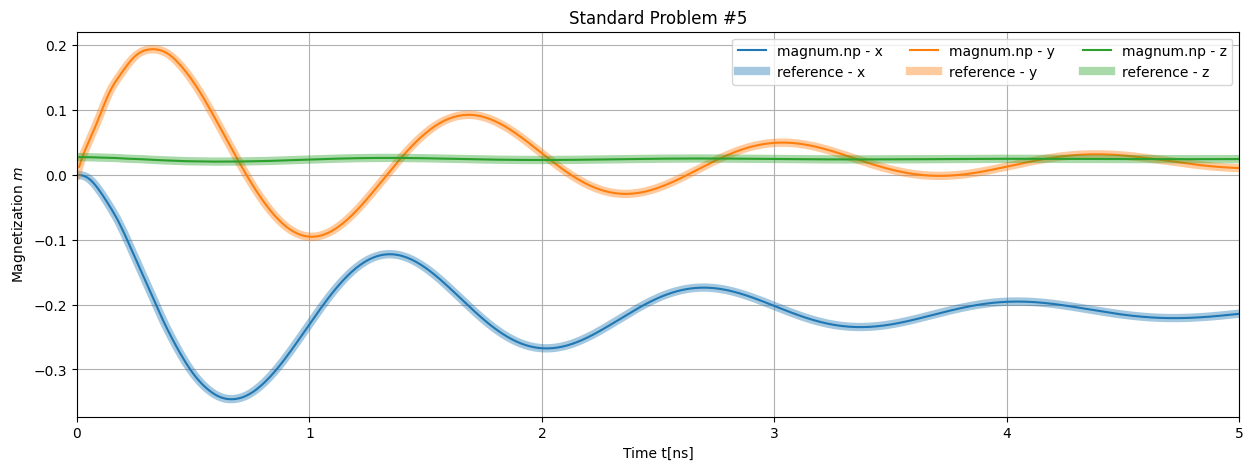

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref = np.loadtxt("ref/m.dat")

fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[:,0]*1e9, ref[:,1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[:,0]*1e9, ref[:,2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[:,0]*1e9, ref[:,3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlim([0,5])
ax.set_title("Standard Problem #5")
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")